In [30]:
import os
import csv
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import poisson
from scipy.stats import beta
from scipy.stats import dirichlet
import model_utils

In [31]:
def read_historical_data(file_y1, file_y2, file_y3):
    y1 = pd.read_csv(file_y1)
    y2 = pd.read_csv(file_y2)
    y3 = pd.read_csv(file_y3)
    return(y1, y2, y3)

def read_current_data(file):
    ycurrent = pd.read_csv(file)
    return(ycurrent)

### Historical

In [32]:
# read historical data
y1, y2, y3 = read_historical_data("players_20162017.csv", "players_20172018.csv", "players_20182019.csv")

In [33]:
def convert_team_marker(teams):
    new_teams = []
    for tm in teams:
        if tm == 'ARS':
            new_teams.append('Arsenal')
        if tm == 'CHE':
            new_teams.append('Chelsea')
        if tm == 'BOU':
            new_teams.append('Bournemouth')
        if tm == 'WHU':
            new_teams.append('West Ham')
        if tm == 'MCI':
            new_teams.append('Man City')
        if tm == 'MUN':
            new_teams.append('Man United')
        if tm == 'LEI':
            new_teams.append('Leicester')
        if tm == 'TOT':
            new_teams.append('Tottenham')
        if tm == 'LIV':
            new_teams.append('Liverpool')
        if tm == 'NEW':
            new_teams.append('Newcastle')
        if tm == 'HUD':
            new_teams.append('Huddersfield')
        if tm == 'FUL':
            new_teams.append('Fulham')
        if tm == 'SOU':
            new_teams.append('Southampton')
        if tm == 'CRY':
            new_teams.append('Crystal Palace')
        if tm == 'CAR':
            new_teams.append('Cardiff')
        if tm == 'EVE':
            new_teams.append('Everton')
        if tm == 'BHA':
            new_teams.append('Brighton')
        if tm == 'BUR':
            new_teams.append('Burnley')
        if tm == 'WOL':
            new_teams.append('Wolves')
        if tm == 'WAT':
            new_teams.append('Watford')
        if tm == 'AVL':
            new_teams.append('Aston Villa')
        if tm == 'MID':
            new_teams.append('Middlesbrough')
        if tm == 'HUL':
            new_teams.append('Hull')
        if tm == 'SWA':
            new_teams.append('Swansea')
        if tm == 'WBA':
            new_teams.append('West Brom')
        if tm == 'STK':
            new_teams.append('Stoke')
        if tm == 'SUN':
            new_teams.append('Sunderland')
        if tm == 'NOR':
            new_teams.append('Norwich')
        if tm == 'SHU':
            new_teams.append('Sheffield United')
    return(new_teams)

In [34]:
def team_code(team_code, season="2016/2017"):
    teams = []
    if season == "2016/2017":
        codes = pd.read_csv("team_id_20162017.csv")
        for i in range(len(team_code)):
            teams.append(codes.loc[codes.index[np.where(codes['id'] == team_code[i])[0][0]], 'Team'])
    if season == "2017/2018":
        codes = pd.read_csv("team_id_20172018.csv")
        for i in range(len(team_code)):
            teams.append(codes.loc[codes.index[np.where(codes['id'] == team_code[i])[0][0]], 'Team'])
    if season == "2018/2019":
        codes = pd.read_csv("team_id_20182019.csv")
        for i in range(len(team_code)):
            teams.append(codes.loc[codes.index[np.where(codes['id'] == team_code[i])[0][0]], 'Team'])
    if season == "2019/2020":
        codes = pd.read_csv("team_id_20192020.csv")
        for i in range(len(team_code)):
            teams.append(codes.loc[codes.index[np.where(codes['id'] == team_code[i])[0][0]], 'Team'])
    return(np.array(teams))

In [35]:
y1 = pd.read_csv("players_raw_20162017.csv")
y1['team_name'] = team_code(y1['team'], season="2016/2017")

y2 = pd.read_csv("players_raw_20172018.csv")
y2['team_name'] = team_code(y2['team'], season="2017/2018")

y3 = pd.read_csv("players_raw_20182019.csv")
y3['team_name'] = team_code(y3['team'], season="2018/2019")

In [36]:
#y1['Team'] = convert_team_marker(y1['Team'])
#y2['Team'] = convert_team_marker(y2['Team'])
#y3['Team'] = convert_team_marker(y3['Team'])

In [37]:
# make games played
y1['Games'] = np.ceil(y1['total_points'] / np.maximum(1, y1['points_per_game'].values))
y2['Games'] = np.ceil(y2['total_points'] / np.maximum(1, y2['points_per_game'].values))
y3['Games'] = np.ceil(y3['total_points'] / np.maximum(1, y3['points_per_game'].values))

In [39]:
# minutes per game per season
y1['MPerc'] = y1['minutes'] / (90. * 38)
y2['MPerc'] = y2['minutes'] / (90. * 38)
y3['MPerc'] = y3['minutes'] / (90. * 38)

In [40]:
# full name
y1['full_name'] = (y1['first_name'] + ' ' + y1['second_name'])
y2['full_name'] = (y2['first_name'] + ' ' + y2['second_name'])
y3['full_name'] = (y3['first_name'] + ' ' + y3['second_name'])

In [41]:
# Season
y1['Season'] = 1
y2['Season'] = 2
y3['Season'] = 3

In [42]:
# teams goals
y1['TGoals'] = np.zeros(len(y1.index))
for i in range(len(y1.index)):
    y1.loc[y1.index[i], 'TGoals'] = np.sum(y1.loc[y1.index[y1['team_name'] == y1.loc[y1.index[i], 'team_name']], 'goals_scored'])
y2['TGoals'] = np.zeros(len(y2.index))
for i in range(len(y2.index)):
    y2.loc[y2.index[i], 'TGoals'] = np.sum(y2.loc[y2.index[y2['team_name'] == y2.loc[y2.index[i], 'team_name']], 'goals_scored'])
y3['TGoals'] = np.zeros(len(y3.index))
for i in range(len(y3.index)):
    y3.loc[y3.index[i], 'TGoals'] = np.sum(y3.loc[y3.index[y3['team_name'] == y3.loc[y3.index[i], 'team_name']], 'goals_scored'])

In [43]:
y1p = []
y2p = []
y3p = []
for i in range(len(y1.index)):
    y1p.append(np.array(['GKP', 'DEF', 'MID', 'FWD'])[int(y1.loc[y1.index[i], "element_type"] - 1)])
for i in range(len(y2.index)):
    y2p.append(np.array(['GKP', 'DEF', 'MID', 'FWD'])[int(y2.loc[y2.index[i], "element_type"] - 1)])
for i in range(len(y3.index)):
    y3p.append(np.array(['GKP', 'DEF', 'MID', 'FWD'])[int(y3.loc[y3.index[i], "element_type"] - 1)])
y1['position'] = y1p
y2['position'] = y2p
y3['position'] = y3p

In [44]:
# Assign player id
def player_id(data):
    ID = []
    players = []
    teams = []
    positions = []
    season = []
    count = 0
    for i in range(np.shape(data)[0]):
        iid = np.where(str(data[i, 61]) == np.array(players))[0]
        #new_count = 0
        a = 0
        if len(iid) >= 1:
            #for j in range(len(iid)):
            # conservative matching of players - same position, team and name
            #if (np.array(teams)[iid[j]] == str(data[i, 58])) and (np.array(positions)[iid[j]] == str(data[i, 64])) and new_count == 0:
            ID.append(ID[iid[0]])
            players.append(data[i, 61])
            teams.append(data[i, 58])
            positions.append(data[i, 64])
            season.append(data[i, 62])
            #new_count = 1
            #if new_count == 0:  # guinely new player
            #ID.append(i)
            #players.append(data[i, 61])
            #teams.append(data[i, 58])
            #positions.append(data[i, 64])
            #season.append(data[i, 62])
            #count += 1
        else:
            ID.append(count)
            players.append(data[i, 61])
            teams.append(data[i, 58])
            positions.append(data[i, 64])
            season.append(data[i, 62])
            count += 1
            
    return(ID, players, teams, positions, season)

In [45]:
ID, players, teams, positions, season = player_id(np.concatenate((y2.as_matrix(), y3.as_matrix())))
id_sel = 1100
print(np.concatenate((y2.as_matrix(), y3.as_matrix()))[id_sel,:])
print(ID[id_sel])
print(np.concatenate((y2.as_matrix(), y3.as_matrix()))[np.where(ID == ID[id_sel])[0].astype(int), :])
print(np.where(ID == ID[id_sel])[0].astype(int))

c:\users\alsgregory\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\alsgregory\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


[8 20 466 '100' '100' 9 57134 0 0 -1 1 468.0 3 0 4 '6.3' 7.3 6 'Salomón'
 6.8 31 11 236.0 493 False 645.6 0 0 0 0 2601 nan '2018-09-23T00:01:15Z'
 59 0 0 0 '57134.jpg' 4.6 0 0 'Rondón' 7.7 False '9' 'a' 15 4 1249.0 148
 1230277 0 855697 0 1.2 25.1 'Rondón' 1 'Newcastle' 33.0
 0.7605263157894737 'Salomón Rondón' 3 41.0 'FWD']
592
[]
[]


c:\users\alsgregory\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alsgregory\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [46]:
#y1['ID'] = ID[0:len(y1['full_name'])]
y2['ID'] = ID[0:len(y2['full_name'])]
y3['ID'] = ID[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))]

In [47]:
id_y2 = np.transpose(np.array([ID[0:len(y2['full_name'])], players[0:len(y2['full_name'])], teams[0:len(y2['full_name'])], positions[0:len(y2['full_name'])], season[0:len(y2['full_name'])]]))
id_y3 = np.transpose(np.array([ID[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))], players[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))], teams[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))], positions[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))], season[len(y2['full_name']):(len(y2['full_name']) + len(y3['full_name']))]]))


### Bayesian update of simplexs

In [48]:
# incorporating data into Bayes of simplexs

# dirichlet for assists/goals/nothing

# beta for percentage of mins they spend on pitch

# strikers can be this distribution prior (goals)
ga_prior_a_f = 1
ga_prior_b_f = 1
ga_prior_c_f = 5

# midfields this prior
ga_prior_a_m = 1
ga_prior_b_m = 1
ga_prior_c_m = 5
print(np.random.dirichlet(np.array([ga_prior_a_m, ga_prior_b_m, ga_prior_c_m])))

# defenders
ga_prior_a_d = 1
ga_prior_b_d = 1
ga_prior_c_d = 15

# goalies
ga_prior_a_g = 1
ga_prior_b_g = 1
ga_prior_c_g = 50

# prior for perc of full 90 minutes played
m_prior_a_g = 45
m_prior_b_g = 3
m_prior_a_d = 45
m_prior_b_d = 3
m_prior_a_m = 45
m_prior_b_m = 3
m_prior_a_f = 45
m_prior_b_f = 3

# prior for perc of games played
p_prior_a_g = 1
p_prior_b_g = 1
p_prior_a_d = 1
p_prior_b_d = 1
p_prior_a_m = 1
p_prior_b_m = 1
p_prior_a_f = 1
p_prior_b_f = 1

[0.09787318 0.08307307 0.81905374]


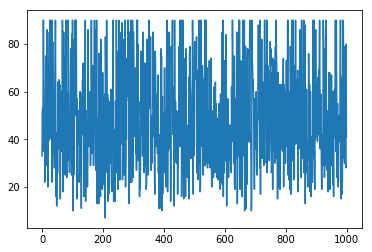

In [49]:
plot.plot(np.fmin(90, np.random.poisson(np.random.gamma(5, 10, 1000))))

#### Updating functions for player simplexs

In [57]:
def update_goals_simplex(prior_a, prior_b, goals_perc, games):
    return(prior_a + (goals_perc * games), prior_b + games - (goals_perc * games))

def update_assists_simplex(prior_a, prior_b, assists_perc, games):
    return(prior_a + (assists_perc * games), prior_b + games - (assists_perc * games))

def update_goals_and_assists_simplex(prior_a, prior_b, prior_c, goals, assists, total_goals):
    return(prior_a + goals, prior_b + assists, prior_c + (total_goals - (assists + goals)))

def update_mins_simplex(prior_a, prior_b, mins_per_season, games_played):
    return(prior_a + mins_per_season, prior_b + games_played)

def update_games_played_simplex(prior_a, prior_b, games_played, games_not_played):
    return(prior_a + games_played, prior_b + games_not_played)

Games are scaling factor for 'how many trials' this peformance carried over

In [141]:
# find posteriors after historical data
IDunique = np.unique(ID)
playersunique = []
teamsunique = []
positionsunique = []
seasonunique = []
for i in range(len(IDunique)):
    ind = np.where(IDunique[i] == ID)[0][-1]  # most recent team and position
    inds = np.where(IDunique[i] == ID)[0]
    playersunique.append(players[ind])
    teamsunique.append(teams[ind])
    positionsunique.append(positions[ind])
    seasonunique.append(np.max(np.array(season)[inds.astype(int)]))  # most recent season id player was playing

players_parameters_dict = {'ID': IDunique, 'player': playersunique, 'team': teamsunique, 'position': positionsunique, 'last_season': seasonunique,
                          'a_goals': np.zeros(len(IDunique)), 'b_goals': np.zeros(len(IDunique)), 'c_goals': np.zeros(len(IDunique)),
                          'a_mins': np.zeros(len(IDunique)), 'b_mins': np.zeros(len(IDunique)),
                          'a_games': np.zeros(len(IDunique)), 'b_games': np.zeros(len(IDunique))}
players_parameters = pd.DataFrame(data = players_parameters_dict)

In [142]:
players_parameters.loc[players_parameters.index[players_parameters['team'] == 'Man City'], :]

,ID,a_games,a_goals,a_mins,b_games,b_goals,b_mins,c_goals,last_season,player,position,team
268,268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Riyad Mahrez,MID,Man City
322,322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Ederson Santana de Moraes,GKP,Man City
323,323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Claudio Bravo,GKP,Man City
324,324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,John Stones,DEF,Man City
325,325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Aleksandar Kolarov,DEF,Man City
326,326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Vincent Kompany,DEF,Man City
327,327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Nicolás Otamendi,DEF,Man City
328,328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Fabian Delph,DEF,Man City
329,329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Raheem Sterling,MID,Man City
330,330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,David Silva,MID,Man City


In [143]:
# fill in priors
for i in range(3):
    if (i == 0):
        for j in range(np.shape(id_y2)[0]):
            idind = players_parameters.index[players_parameters['ID'] == y2.loc[y2.index[j], 'ID']]
            if y2.loc[y2.index[j], 'position'] == 'GKP':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_g
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_g
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_g
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_g
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_g
                players_parameters.loc[idind, 'a_games'] = p_prior_a_g
                players_parameters.loc[idind, 'b_games'] = p_prior_b_g
            if y2.loc[y2.index[j], 'position'] == 'MID':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_m
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_m
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_m
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_m
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_m
                players_parameters.loc[idind, 'a_games'] = p_prior_a_m
                players_parameters.loc[idind, 'b_games'] = p_prior_b_m
            if y2.loc[y2.index[j], 'position'] == 'DEF':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_d
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_d
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_d
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_d
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_d
                players_parameters.loc[idind, 'a_games'] = p_prior_a_d
                players_parameters.loc[idind, 'b_games'] = p_prior_b_d
            if y2.loc[y2.index[j], 'position'] == 'FWD':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_f
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_f
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_f
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_f
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_f
                players_parameters.loc[idind, 'a_games'] = p_prior_a_f
                players_parameters.loc[idind, 'b_games'] = p_prior_b_f
    if (i == 1):
        for j in range(np.shape(id_y3)[0]):
            idind = players_parameters.index[players_parameters['ID'] == y3.loc[y3.index[j], 'ID']]
            if y3.loc[y3.index[j], 'position'] == 'GKP':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_g
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_g
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_g
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_g
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_g
                players_parameters.loc[idind, 'a_games'] = p_prior_a_g
                players_parameters.loc[idind, 'b_games'] = p_prior_b_g
            if y3.loc[y3.index[j], 'position'] == 'MID':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_m
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_m
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_m
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_m
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_m
                players_parameters.loc[idind, 'a_games'] = p_prior_a_m
                players_parameters.loc[idind, 'b_games'] = p_prior_b_m
            if y3.loc[y3.index[j], 'position'] == 'DEF':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_d
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_d
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_d
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_d
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_d
                players_parameters.loc[idind, 'a_games'] = p_prior_a_d
                players_parameters.loc[idind, 'b_games'] = p_prior_b_d
            if y3.loc[y3.index[j], 'position'] == 'FWD':
                players_parameters.loc[idind, 'a_goals'] = ga_prior_a_f
                players_parameters.loc[idind, 'b_goals'] = ga_prior_b_f
                players_parameters.loc[idind, 'c_goals'] = ga_prior_c_f
                players_parameters.loc[idind, 'a_mins'] = m_prior_a_f
                players_parameters.loc[idind, 'b_mins'] = m_prior_b_f
                players_parameters.loc[idind, 'a_games'] = p_prior_a_f
                players_parameters.loc[idind, 'b_games'] = p_prior_b_f

In [144]:
players_parameters.index

RangeIndex(start=0, stop=853, step=1)

In [145]:
# update with historical data - posterior
for i in range(len(players_parameters.index)):
    # scale season importance!
    #if len(y1.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y1['ID'].values]) > 0:
    #    idind = y1.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y1['ID'].values]
    #    gms = 38 * 0.2
    #    goa = (y1.loc[y1.index[idind], 'goals_scored'].values[0]) * 0.2
    #    mns = y1.loc[y1.index[idind], 'minutes'].values[0] * 0.2
    #    assi = (y1.loc[y1.index[idind], 'assists'].values[0]) * 0.2
    #    tgoa = (y1.loc[y1.index[idind], 'TGoals'].values[0]) * 0.2

    #    post_a_goals, post_b_goals, post_c_goals = update_goals_and_assists_simplex(players_parameters.loc[players_parameters.index[i], 'a_goals'],
    #                                                                                players_parameters.loc[players_parameters.index[i], 'b_goals'],
    #                                                                                players_parameters.loc[players_parameters.index[i], 'c_goals'],
    #                                                                                goa, assi, tgoa)
    #    post_a_mins, post_b_mins = update_mins_simplex(players_parameters.loc[players_parameters.index[i], 'a_mins'],
    #                                                   players_parameters.loc[players_parameters.index[i], 'b_mins'],
    #                                                   mns, gms)

    #    players_parameters.loc[players_parameters.index[i], 'a_goals'] = post_a_goals
    #    players_parameters.loc[players_parameters.index[i], 'b_goals'] = post_b_goals
    #    players_parameters.loc[players_parameters.index[i], 'c_goals'] = post_c_goals
    #    players_parameters.loc[players_parameters.index[i], 'a_mins'] = post_a_mins
    #    players_parameters.loc[players_parameters.index[i], 'b_mins'] = post_b_mins

    # scale season importance!
    if len(y2.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y2['ID'].values]) > 0:
        idind = y2.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y2['ID'].values]
        gms = (y2.loc[y2.index[idind], 'Games'].values[0]) * 0.3
        goa = (y2.loc[y2.index[idind], 'goals_scored'].values[0]) * 0.3
        mns = y2.loc[y2.index[idind], 'minutes'].values[0] * 0.3
        assi = (y2.loc[y2.index[idind], 'assists'].values[0]) * 0.3
        tgoa = (y2.loc[y2.index[idind], 'TGoals'].values[0]) * 0.3

        post_a_goals, post_b_goals, post_c_goals = update_goals_and_assists_simplex(players_parameters.loc[players_parameters.index[i], 'a_goals'],
                                                                                    players_parameters.loc[players_parameters.index[i], 'b_goals'],
                                                                                    players_parameters.loc[players_parameters.index[i], 'c_goals'],
                                                                                    goa, assi, tgoa)
        post_a_mins, post_b_mins = update_mins_simplex(players_parameters.loc[players_parameters.index[i], 'a_mins'],
                                                          players_parameters.loc[players_parameters.index[i], 'b_mins'],
                                                          mns, gms)
        post_a_played, post_b_played = update_games_played_simplex(players_parameters.loc[players_parameters.index[i], 'a_games'],
                                                          players_parameters.loc[players_parameters.index[i], 'b_games'],
                                                          gms, (38 * 0.3) - gms)

        players_parameters.loc[players_parameters.index[i], 'a_goals'] = post_a_goals
        players_parameters.loc[players_parameters.index[i], 'b_goals'] = post_b_goals
        players_parameters.loc[players_parameters.index[i], 'c_goals'] = post_c_goals
        players_parameters.loc[players_parameters.index[i], 'a_mins'] = post_a_mins
        players_parameters.loc[players_parameters.index[i], 'b_mins'] = post_b_mins
        players_parameters.loc[players_parameters.index[i], 'a_games'] = post_a_played
        players_parameters.loc[players_parameters.index[i], 'b_games'] = post_b_played

    if len(y3.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y3['ID'].values]) > 0:
        idind = y3.index[players_parameters.loc[players_parameters.index[i], 'ID'] == y3['ID'].values]
        gms = (y3.loc[y3.index[idind], 'Games'].values[0]) * 0.5
        goa = (y3.loc[y3.index[idind], 'goals_scored'].values[0]) * 0.5
        mns = y3.loc[y3.index[idind], 'minutes'].values[0] * 0.5
        assi = (y3.loc[y3.index[idind], 'assists'].values[0]) * 0.5
        tgoa =  (y3.loc[y3.index[idind], 'TGoals'].values[0]) * 0.5

        post_a_goals, post_b_goals, post_c_goals = update_goals_and_assists_simplex(players_parameters.loc[players_parameters.index[i], 'a_goals'],
                                                                                    players_parameters.loc[players_parameters.index[i], 'b_goals'],
                                                                                    players_parameters.loc[players_parameters.index[i], 'c_goals'],
                                                                                    goa, assi, tgoa)
        post_a_mins, post_b_mins = update_mins_simplex(players_parameters.loc[players_parameters.index[i], 'a_mins'],
                                                          players_parameters.loc[players_parameters.index[i], 'b_mins'],
                                                          mns, gms)
        post_a_played, post_b_played = update_games_played_simplex(players_parameters.loc[players_parameters.index[i], 'a_games'],
                                                          players_parameters.loc[players_parameters.index[i], 'b_games'],
                                                          gms, (38 * 0.5) - gms)

        players_parameters.loc[players_parameters.index[i], 'a_goals'] = post_a_goals
        players_parameters.loc[players_parameters.index[i], 'b_goals'] = post_b_goals
        players_parameters.loc[players_parameters.index[i], 'c_goals'] = post_c_goals
        players_parameters.loc[players_parameters.index[i], 'a_mins'] = post_a_mins
        players_parameters.loc[players_parameters.index[i], 'b_mins'] = post_b_mins
        players_parameters.loc[players_parameters.index[i], 'a_games'] = post_a_played
        players_parameters.loc[players_parameters.index[i], 'b_games'] = post_b_played

In [146]:
players_parameters

,ID,a_games,a_goals,a_mins,b_games,b_goals,b_mins,c_goals,last_season,player,position,team
0,0,2.5,1.0,159.0,10.9,1.0,4.5,68.9,2,David Ospina,GKP,Arsenal
1,1,15.5,1.0,1249.2,16.9,1.0,17.5,103.4,3,Petr Cech,GKP,Arsenal
2,2,1.0,1.0,45.0,12.4,1.0,3.0,68.9,2,Damian Emiliano Martinez,GKP,Arsenal
3,3,17.5,3.1,1377.0,14.9,1.0,19.5,66.3,3,Laurent Koscielny,DEF,Arsenal
4,4,2.8,1.3,154.2,10.6,1.0,4.8,33.6,2,Per Mertesacker,DEF,Arsenal
5,5,1.0,1.0,45.0,12.4,1.0,3.0,33.9,2,Gabriel Armando de Abreu,DEF,Arsenal
6,6,21.0,1.6,1726.0,11.4,4.7,23.0,64.1,3,Héctor Bellerín,DEF,Arsenal
7,7,3.0,1.0,127.5,29.4,1.0,5.0,68.4,3,Carl Jenkinson,DEF,Arsenal
8,8,20.7,3.0,1647.3,11.7,3.6,22.7,63.8,3,Nacho Monreal,DEF,Arsenal
9,9,9.6,1.0,693.7,22.8,1.3,11.6,68.1,3,Rob Holding,DEF,Arsenal


In [149]:
# example of new min played model (taking into account sometimes not starting a game, or prior knowledge they will!)
# poisson and gamma to decide mins per games PLAYED
# and bernoilli and dirichlet to decide games PLAYED
np.random.choice([1, 0], 1, p=(np.random.dirichlet([28.9, 3.5])))[0] * np.random.poisson(np.random.gamma(2300, 1 / 30))

65

Don't need mins-played parameter included in points from scoring for each team goal, since this is taken into account by dividing by ALL of teams goals in season, even when player not on pitch.

In [148]:
# save parameters
players_parameters.to_csv("all_players_params.csv", index=False)

## Update using week-by-week performance data

In [123]:
# function pre-requisits: bayesian updating functions, prior distributions (adding new players when appearing in gw's)

In [135]:
def name_replace(names):
    replacements = []
    for i in range(names):
        names[i].replace(" ", "_")
        replacements.append(names[i])
    return(np.array(replacements))

In [136]:
game_week_data = "gw_test.csv"  # change every week
current_season = 4
raw_data_for_this_season = "players_raw_20182019.csv"  # doesnt change from week to week - but best to update the file everyweek

In [137]:
# read raw gw data
data = []
with open(game_week_data) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for i, row in enumerate(csv_reader):
        if i > 0:
            data.append(row)
dataraw = np.array(data)

# find id of players in gw data
ids = []
for i in range(np.shape(dataraw)[0]):
    ids.append(int(dataraw[i, 0].split("_")[-1]))

# match these ids to player raw data (with correct format names, corresponding to players parameters data frame)
# this raw data needs to be same as this season
name_data = pd.read_csv(raw_data_for_this_season)
name_data['team_name'] = team_code(name_data['team'], season="2019/2020")
p = []
for i in range(len(name_data.index)):
    p.append(np.array(['GKP', 'DEF', 'MID', 'FWD'])[int(name_data.loc[name_data.index[i], "element_type"] - 1)])
name_data['position'] = p

corr_names = []
corr_positions = []
corr_teams = []
for i in range(len(ids)):
    corr_names.append(name_data.loc[name_data.index[np.where(name_data.loc[:, 'id'] == ids[i])[0][0]], 'first_name'] + ' ' + name_data.loc[name_data.index[np.where(name_data.loc[:, 'id'] == ids[i])[0][0]], 'second_name'])
    corr_positions.append(name_data.loc[name_data.index[np.where(name_data.loc[:, 'id'] == ids[i])[0][0]], 'position'])
    corr_teams.append(name_data.loc[name_data.index[np.where(name_data.loc[:, 'id'] == ids[i])[0][0]], 'team_name'])

# finally revise dataraw
data = pd.read_csv(game_week_data, usecols=range(1, 54))
data['name'] = corr_names
data['position'] = corr_positions
data['team'] = corr_teams
#new_gameweek['name'] = name_replace(new_gameweek['name'])

In [138]:
all_players_parameters = pd.read_csv("all_players_params.csv")

In [139]:
current_ID_count = np.max(all_players_parameters['ID'].values) + 1
for i in range(len(data.index)):
    
    # in data, search for matches in all_players params, if not found, append row to all players paramas and set with priors
    ind = np.where(all_players_parameters['player'] == data.loc[data.index[i], 'name'])[0]
    
    # then, after all players are included, update with gameweeks worth of data (if player didn't exist before, this will
    # be first addition to inference after prior setting)
    if len(ind) == 0:

        # set new ID
        idnew = current_ID_count
        teamnew = data.loc[data.index[i], 'team']
        positionnew = data.loc[data.index[i], 'position']
        namenew = data.loc[data.index[i], 'name']
        if positionnew == 'GKP':
            all_players_parameters = all_players_parameters.append({'ID': idnew, 'a_goals': ga_prior_a_g, 'a_mins': m_prior_a_g, 'b_goals': ga_prior_b_g,
                                           'b_mins': m_prior_b_g, 'a_games': p_prior_a_g, 'b_games': p_prior_b_g, 'c_goals': ga_prior_c_g, 'last_season': current_season,
                                           'player': namenew, 'position': positionnew, 'team': teamnew}, ignore_index=True)
        if positionnew == 'DEF':
            all_players_parameters = all_players_parameters.append({'ID': idnew, 'a_goals': ga_prior_a_d, 'a_mins': m_prior_a_d, 'b_goals': ga_prior_b_d,
                                           'b_mins': m_prior_b_d, 'a_games': p_prior_a_d, 'b_games': p_prior_b_d, 'c_goals': ga_prior_c_d, 'last_season': current_season,
                                           'player': namenew, 'position': positionnew, 'team': teamnew}, ignore_index=True)
        if positionnew == 'MID':
            all_players_parameters = all_players_parameters.append({'ID': idnew, 'a_goals': ga_prior_a_m, 'a_mins': m_prior_a_m, 'b_goals': ga_prior_b_m,
                                           'b_mins': m_prior_b_m, 'a_games': p_prior_a_m, 'b_games': p_prior_b_m, 'c_goals': ga_prior_c_m, 'last_season': current_season,
                                           'player': namenew, 'position': positionnew, 'team': teamnew}, ignore_index=True)
        if positionnew == 'FWD':
            all_players_parameters = all_players_parameters.append({'ID': idnew, 'a_goals': ga_prior_a_f, 'a_mins': m_prior_a_f, 'b_goals': ga_prior_b_f,
                                           'b_mins': m_prior_b_f, 'a_games': p_prior_a_f, 'b_games': p_prior_b_f, 'c_goals': ga_prior_c_f, 'last_season': current_season,
                                           'player': namenew, 'position': positionnew, 'team': teamnew}, ignore_index=True)
        
        # update max ID count
        current_ID_count += 1
    
    # update all_players params
    new_ind = np.where(all_players_parameters['player'] == data.loc[data.index[i], 'name'])[0][0]  # index now all_players_params is appended
    goa = data.loc[data.index[i], 'goals_scored']
    assi = data.loc[data.index[i], 'assists']
    mns = data.loc[data.index[i], 'minutes']
    tgoa = np.sum(data.loc[data.index[data['team'] == data.loc[data.index[i], 'team']], 'goals_scored'])
    gms = data.loc[data.index[i], 'minutes'] > 0
    
    post_a_goals, post_b_goals, post_c_goals = update_goals_and_assists_simplex(all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_goals'],
                                                                                all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_goals'],
                                                                                all_players_parameters.loc[all_players_parameters.index[new_ind], 'c_goals'],
                                                                                goa, assi, tgoa)
    post_a_mins, post_b_mins = update_mins_simplex(all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_mins'],
                                                   all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_mins'],
                                                   mns, gms)
    post_a_played, post_b_played = update_games_played_simplex(all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_games'],
                                                   all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_games'],
                                                   gms, 1 - gms)

    all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_goals'] = post_a_goals
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_goals'] = post_b_goals
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'c_goals'] = post_c_goals
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_mins'] = post_a_mins
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_mins'] = post_b_mins
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'a_games'] = post_a_played
    all_players_parameters.loc[all_players_parameters.index[new_ind], 'b_games'] = post_b_played


In [ ]:
# save parameters
#all_players_parameters.to_csv("all_players_params.csv", index=False)